# Segment with stardist model

In [35]:
from skimage.io import imread, imsave
from tnia.plotting.projections import show_xyz_slice, show_xyz_max
from stardist.models import Config3D, StarDist3D
from skimage.transform import resize
import os
from tnia.plotting.plt_helper import random_label_cmap
import tnia.utility.decon_helper as dh

# define random label colormap, this is used to show the labels
colormap=random_label_cmap()

# Load an input image

In this cell we load an input image.  Note that the image is bigger than the patch size we trained on.  The CSBDeep framework will take care of applying the network in chunks. 

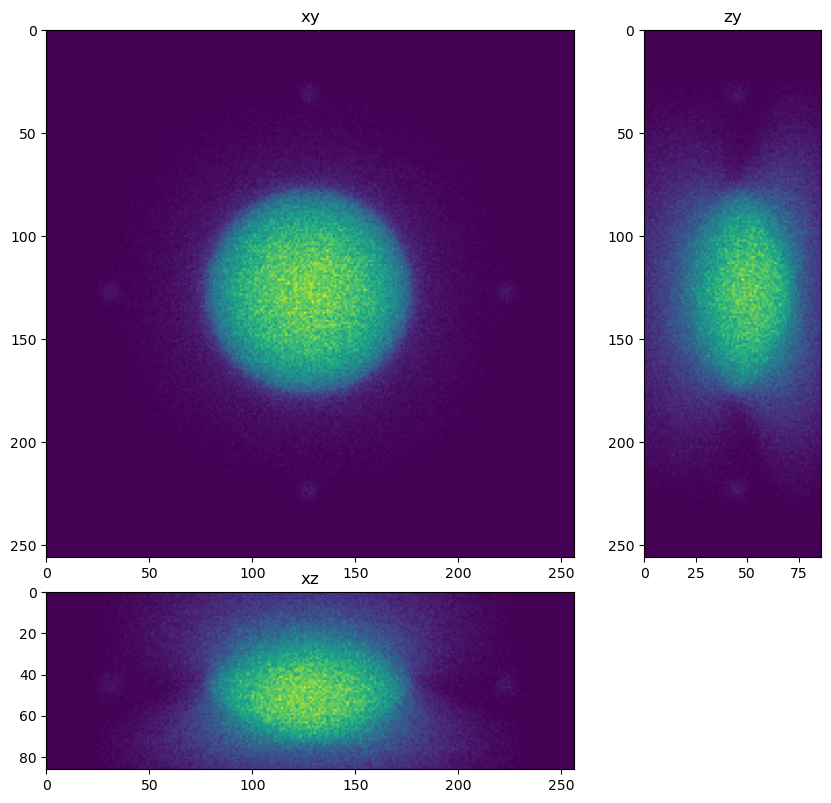

In [36]:
input = imread('../../data/deconvolution/simulation/im.tif')
dh.show_xyz_slice(input, 'tnia')

In [37]:
nmin=input.min()
nmax=input.max()
normalized = (input.astype('float32')-nmin) / (nmax - nmin)

# Load the model

Load the model that we trained in the previous notebook

In [39]:

# load the model using the name of the model and the path to the model
model = StarDist3D(None, 'stardist_big', basedir='C:\\Users\\bnort\\work\\ImageJ2022\\tnia\\models363')

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [40]:
normalized.min(), normalized.max()

(0.0, 1.0)

In [41]:
from tnia.deeplearning.dl_helper import apply_stardist


In [42]:
labels_, details = apply_stardist(normalized, model, prob_thresh=0.1, nms_thresh=0.1, down_sample=1, pmin=0, pmax=100)

In [32]:
labels_.min(), labels_.max()

(0, 6)

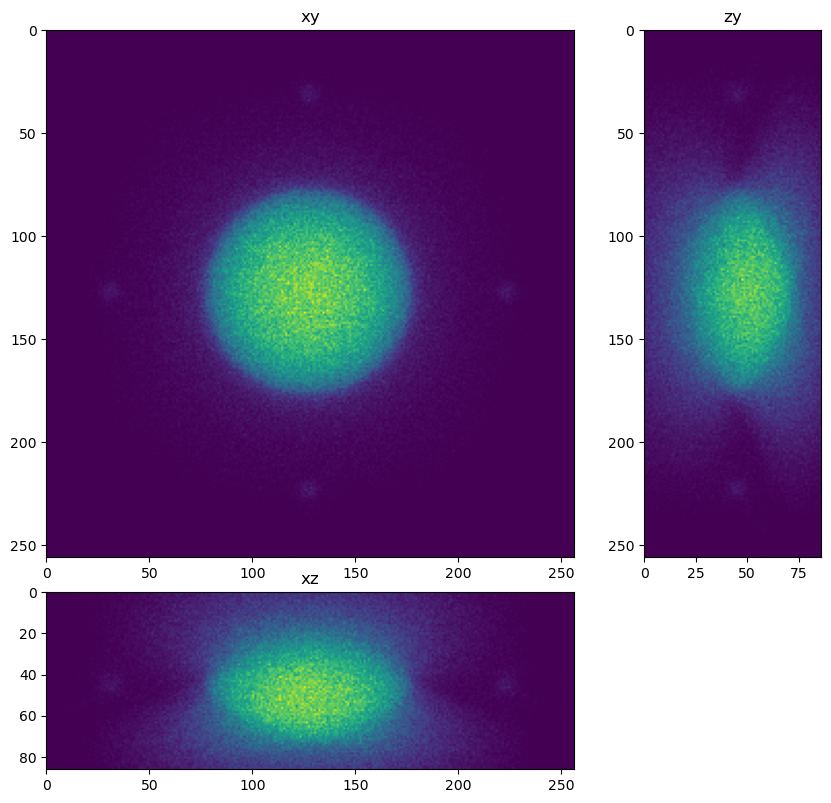

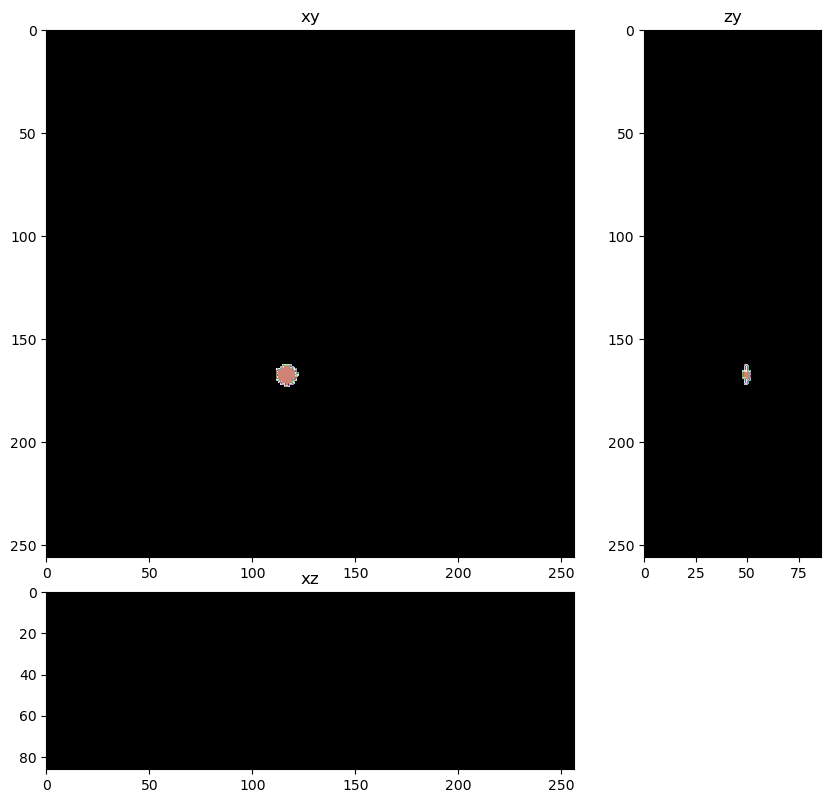

In [33]:
fig = show_xyz_slice(normalized, 128, 128, 43,1,1)
fig = show_xyz_slice(labels_, 128, 128, 43,1,1,colormap=colormap)

In [34]:
import napari
viewer = napari.Viewer()
viewer.add_image(normalized)
viewer.add_labels(labels_, name='stardist')
viewer.show()

napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'
